<a href="https://colab.research.google.com/github/tashisharma10/Spotify-EDA/blob/main/Spotify_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
sns.set_style('darkgrid')

In [ ]:
df=pd.read_csv('/content/data.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


data cleaning

In [ ]:
df.isna().sum()

,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
key,0
liveness,0
loudness,0
mode,0
speechiness,0


In [ ]:
df = df.drop_duplicates()

In [109]:
df = df.drop_duplicates(subset=['song_title', 'artist'], keep='first')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1982 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      1982 non-null   float64
 1   danceability      1982 non-null   float64
 2   duration_ms       1982 non-null   int64  
 3   energy            1982 non-null   float64
 4   instrumentalness  1982 non-null   float64
 5   key               1982 non-null   int64  
 6   liveness          1982 non-null   float64
 7   loudness          1982 non-null   float64
 8   mode              1982 non-null   int64  
 9   speechiness       1982 non-null   float64
 10  tempo             1982 non-null   float64
 11  time_signature    1982 non-null   float64
 12  valence           1982 non-null   float64
 13  target            1982 non-null   int64  
 14  song_title        1982 non-null   object 
 15  artist            1982 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory usag

In [ ]:
df.shape

(1982, 16)

In [ ]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [ ]:
len(df.columns)

16

In [ ]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,1982.000000,1982.000000,1.982000e+03,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000
mean,0.187395,0.618219,2.456515e+05,0.683027,0.132951,5.338042,0.190235,-7.063214,0.613522,0.092573,121.703797,3.968214,0.498678,0.501009
std,0.259450,0.160695,8.128959e+04,0.210190,0.272867,3.652464,0.155190,3.764363,0.487065,0.089468,26.708688,0.257152,0.247008,0.500125
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009510,0.514000,1.997088e+05,0.564250,0.000000,2.000000,0.092200,-8.375750,0.000000,0.037500,100.216500,4.000000,0.297250,0.000000
50%,0.063700,0.631000,2.289150e+05,0.716500,0.000074,6.000000,0.126000,-6.242500,1.000000,0.054900,121.973500,4.000000,0.494500,1.000000
75%,0.265000,0.737750,2.697928e+05,0.847750,0.053975,9.000000,0.245250,-4.723250,1.000000,0.108000,137.914000,4.000000,0.692000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


# **TOP 5 POPULAR ARTISTS**

In [ ]:

top_five_artists=df.groupby("artist").count().sort_values(by="song_title",ascending=False)["song_title"][:5]
top_five_artists

,song_title
artist,
Drake,15
Rick Ross,13
Disclosure,12
WALK THE MOON,10
Backstreet Boys,9


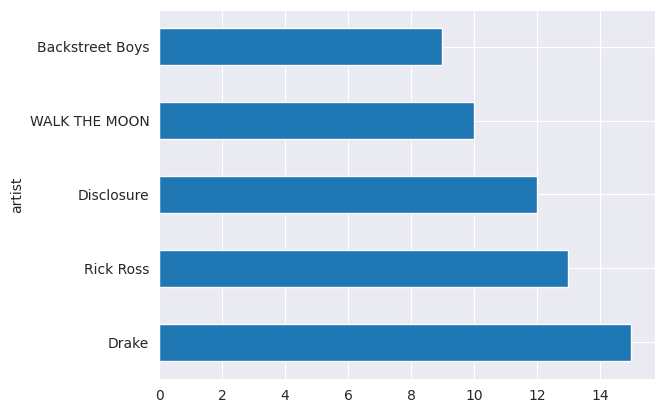

In [ ]:
top_five_artists.plot(kind="barh")
plt.show()

# **TOP 5 LOUDEST TRACKS**

In [ ]:
top_five_loudest_tracks=df[["loudness","song_title"]].sort_values(by="loudness",ascending=False)[:5]
top_five_loudest_tracks

,loudness,song_title
195,-0.307,GodLovesUgly
636,-0.718,The Lion - Original Mix
1443,-0.787,The Wall
2010,-0.935,Hey Baby - Steve Aoki Remix
1299,-0.994,No Absolution


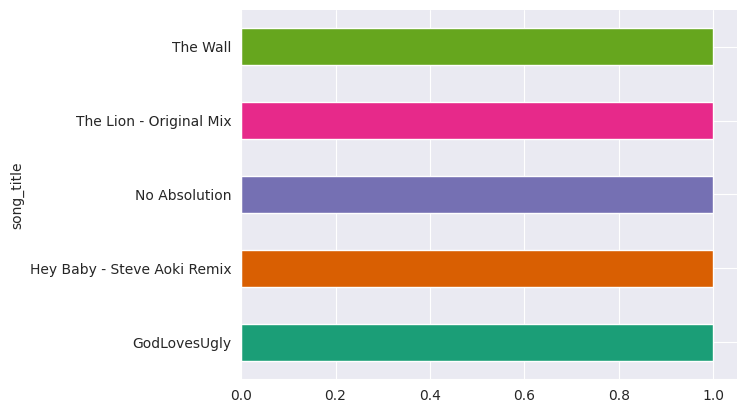

In [ ]:

top_five_loudest_tracks.groupby('song_title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

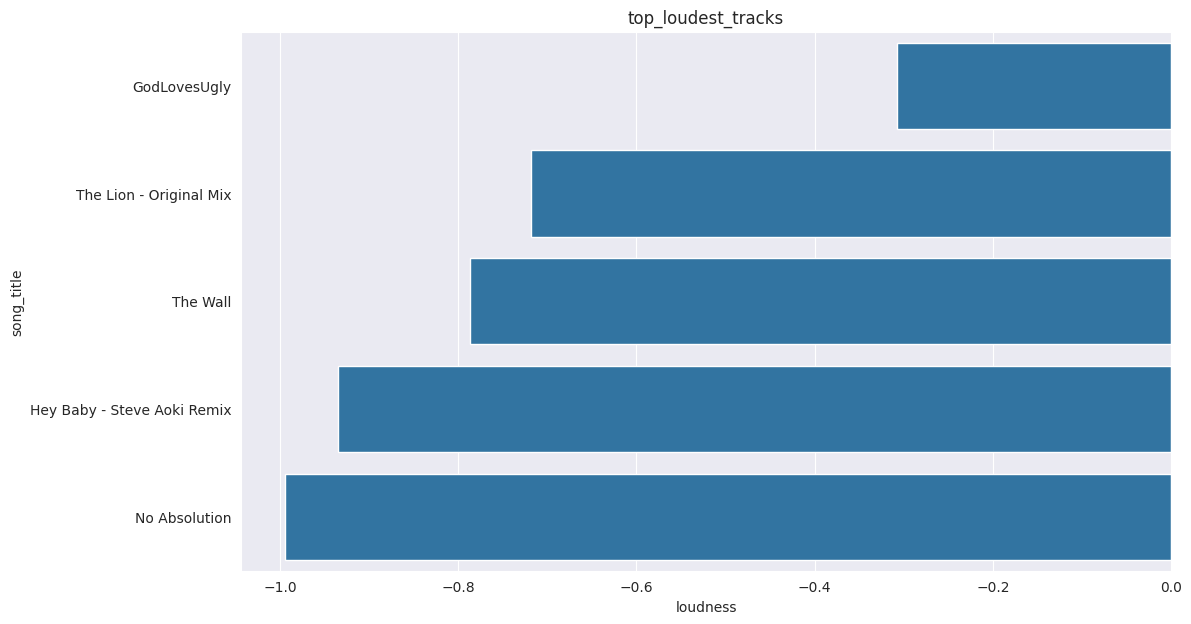

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x="loudness",y="song_title",data=top_five_loudest_tracks)
plt.title("top_loudest_tracks")
plt.show()


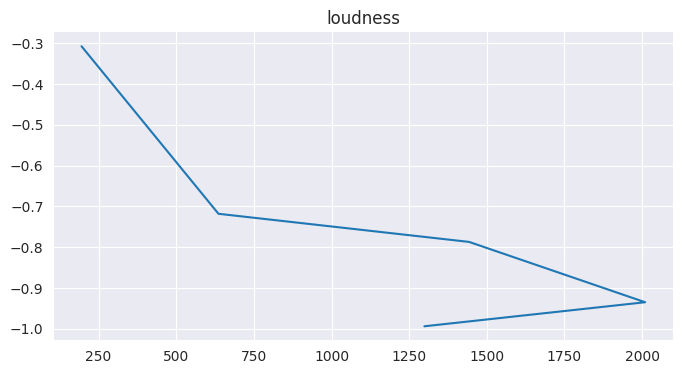

In [ ]:

top_five_loudest_tracks['loudness'].plot(kind='line', figsize=(8, 4), title='loudness')
plt.gca().spines[['top', 'right']].set_visible(False)

# **Artist with most dancebility song**

In [ ]:
top_five_artists_danceable_songs=df[["danceability","song_title","artist"]].sort_values(by="danceability",ascending=False)[:5]
top_five_artists_danceable_songs

,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice


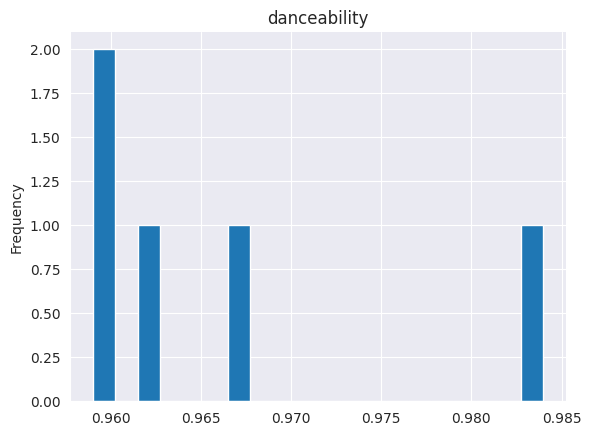

In [ ]:

top_five_artists_danceable_songs['danceability'].plot(kind='hist', bins=20, title='danceability')
plt.gca().spines[['top', 'right',]].set_visible(False)

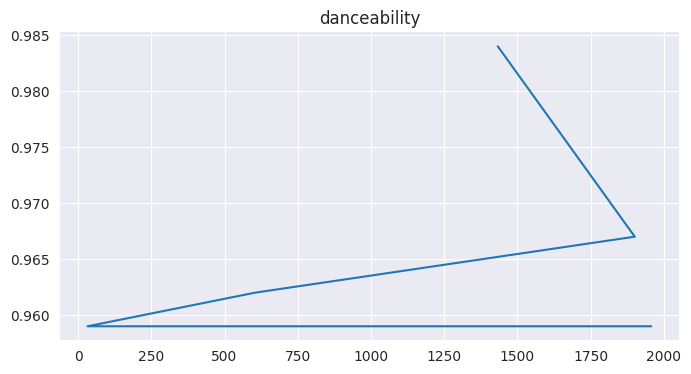

In [ ]:

top_five_artists_danceable_songs['danceability'].plot(kind='line', figsize=(8, 4), title='danceability')
plt.gca().spines[['top', 'right']].set_visible(False)

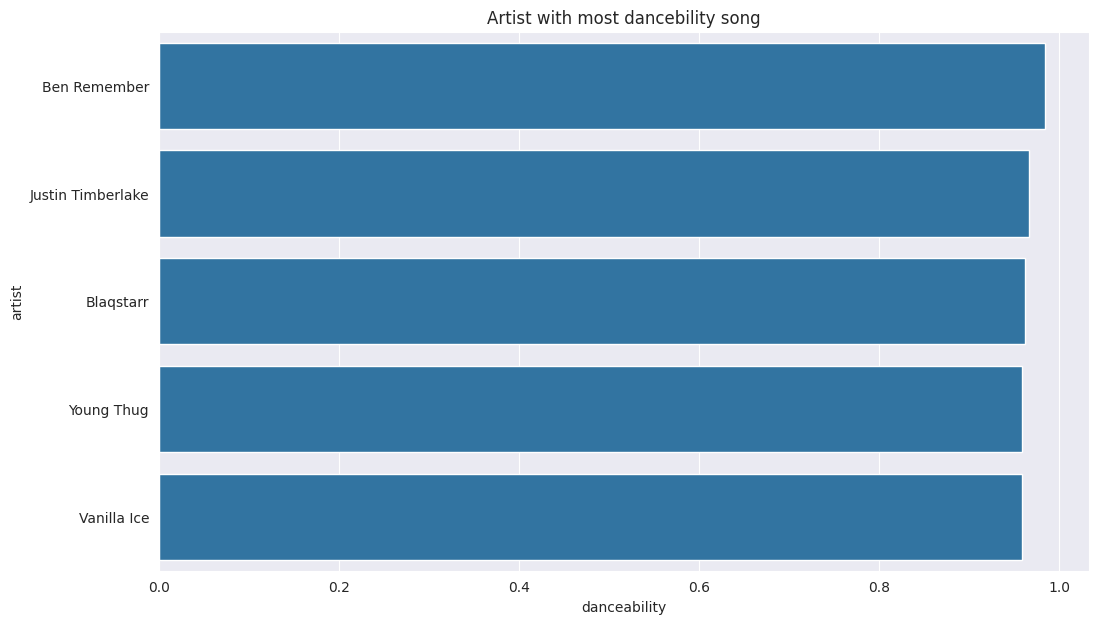

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x="danceability",y="artist",data=top_five_artists_danceable_songs)
plt.title("Artist with most dancebility song")
plt.show()

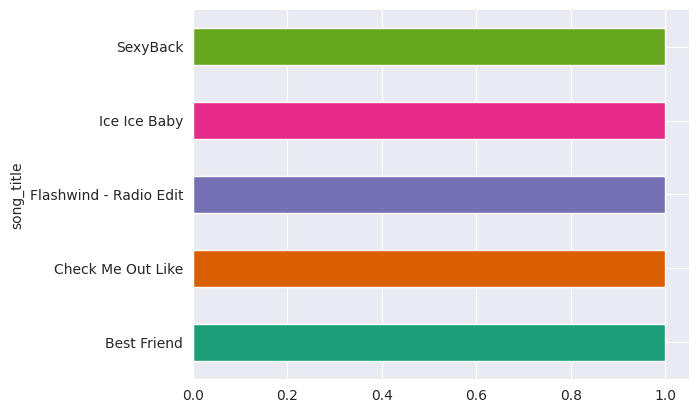

In [ ]:

top_five_artists_danceable_songs.groupby('song_title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

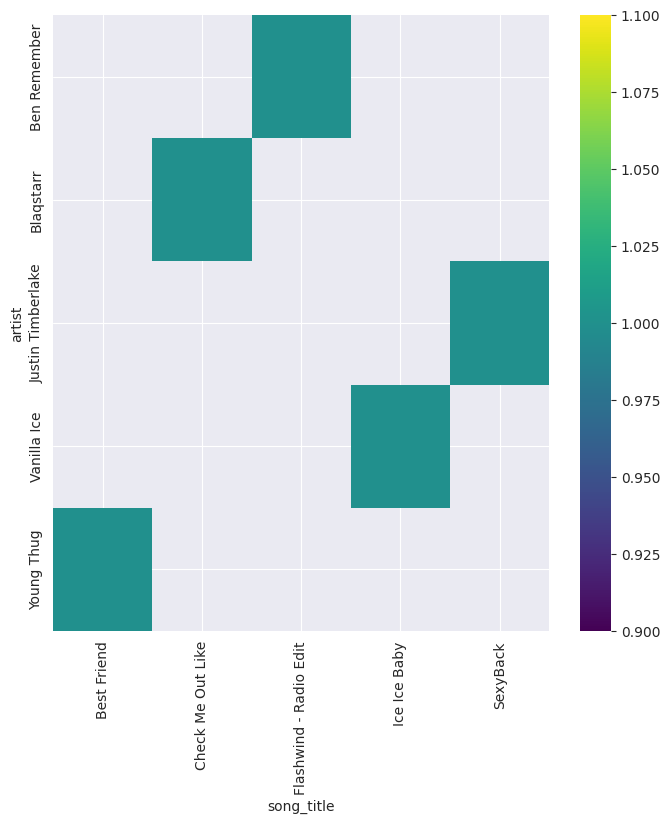

In [ ]:

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['artist'].value_counts()
    for x_label, grp in top_five_artists_danceable_songs.groupby('song_title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('song_title')
_ = plt.ylabel('artist')

# **TOP 10 INSTRUMENTAL TRACKS**

In [ ]:
top_10_instrumental_tracks=df[["instrumentalness","song_title","artist"]].sort_values(by="instrumentalness",ascending=False)[:10]


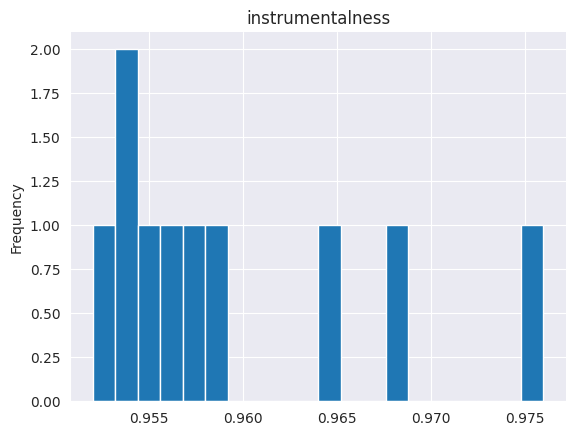

In [ ]:

top_10_instrumental_tracks['instrumentalness'].plot(kind='hist', bins=20, title='instrumentalness')
plt.gca().spines[['top', 'right',]].set_visible(False)

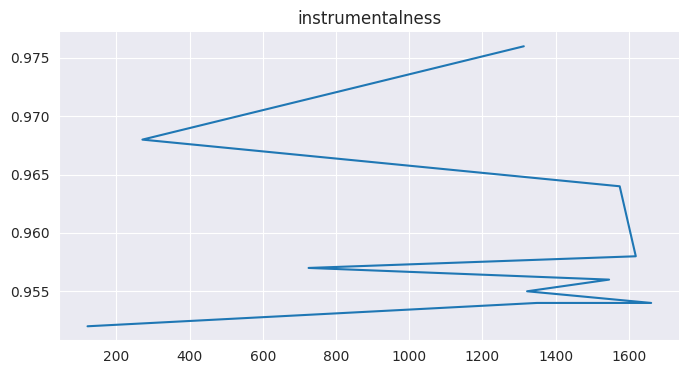

In [ ]:

top_10_instrumental_tracks['instrumentalness'].plot(kind='line', figsize=(8, 4), title='instrumentalness')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
top_10_instrumental_tracks = df.nlargest(10, 'instrumentalness')[['instrumentalness', 'song_title']]
top_10_instrumental_tracks  # Display the DataFrame


,instrumentalness,song_title
1313,0.976,Senseless Order
271,0.968,So Destroyed (channeling Rage Peace)
1575,0.964,A Hundred Dreams from Now
1619,0.958,Raven
725,0.957,Strandbar (disko)
1546,0.956,Almas vaggvisa
1322,0.955,Pitchblack
1349,0.954,Prismatic Abyss
1661,0.954,Yebisah
121,0.952,Chasing Heaven


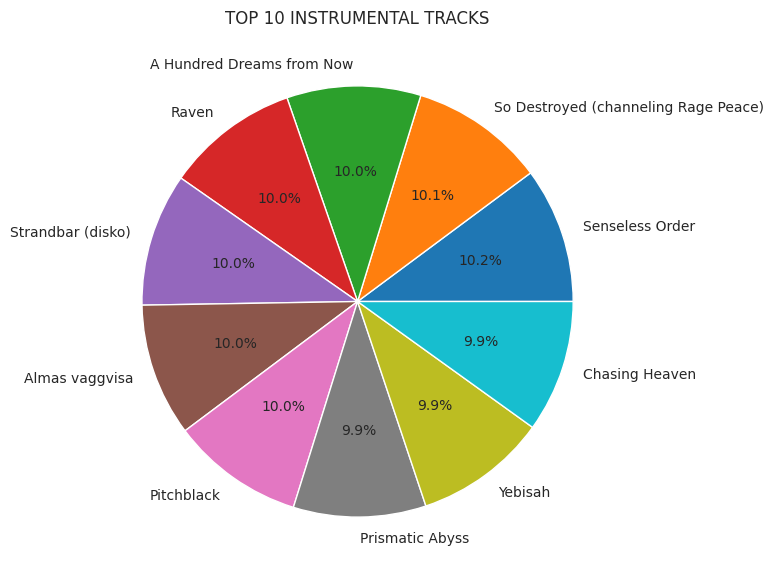

In [ ]:
labels_list = top_10_instrumental_tracks['song_title'].tolist()
plt.figure(figsize=(12,7))
plt.pie(
    top_10_instrumental_tracks['instrumentalness'],
    labels=labels_list,
    autopct='%1.1f%%'
)
plt.title("TOP 10 INSTRUMENTAL TRACKS")
plt.show()



# **MULTIPLE FEATURE PLOTS**

In [ ]:
interest_feature_cols=['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']

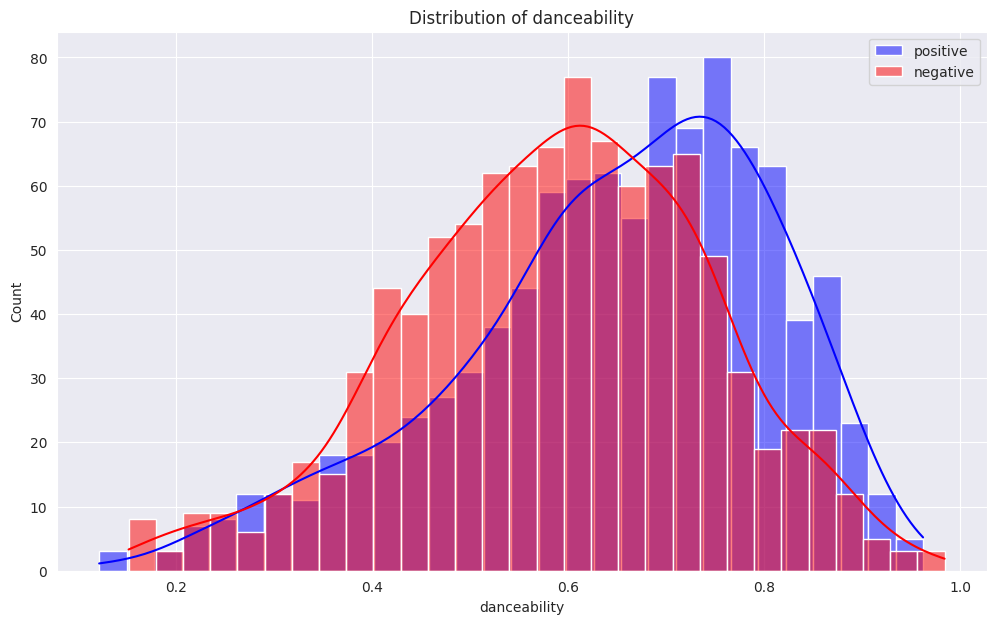

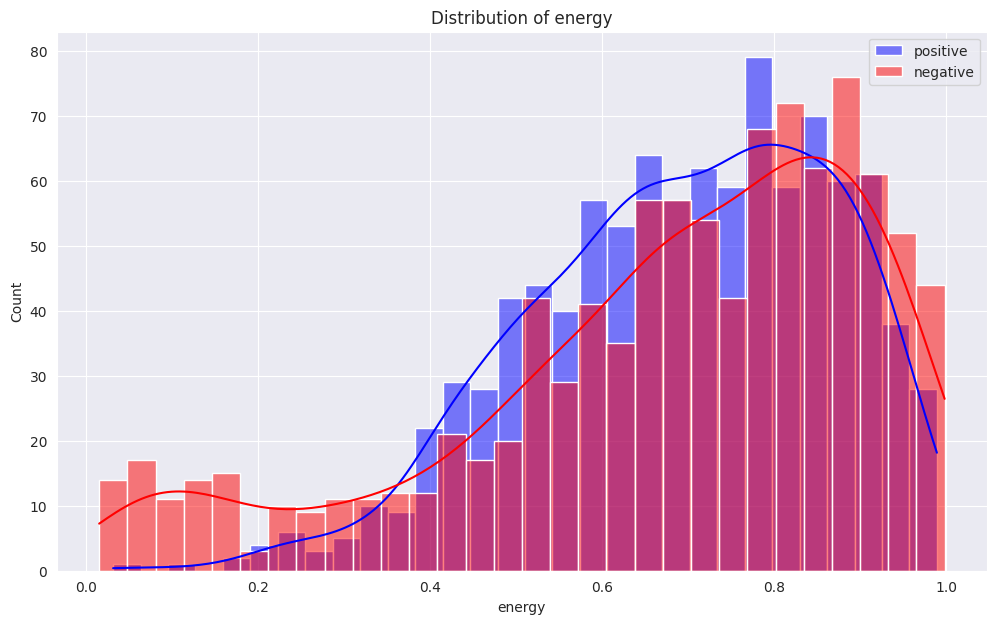

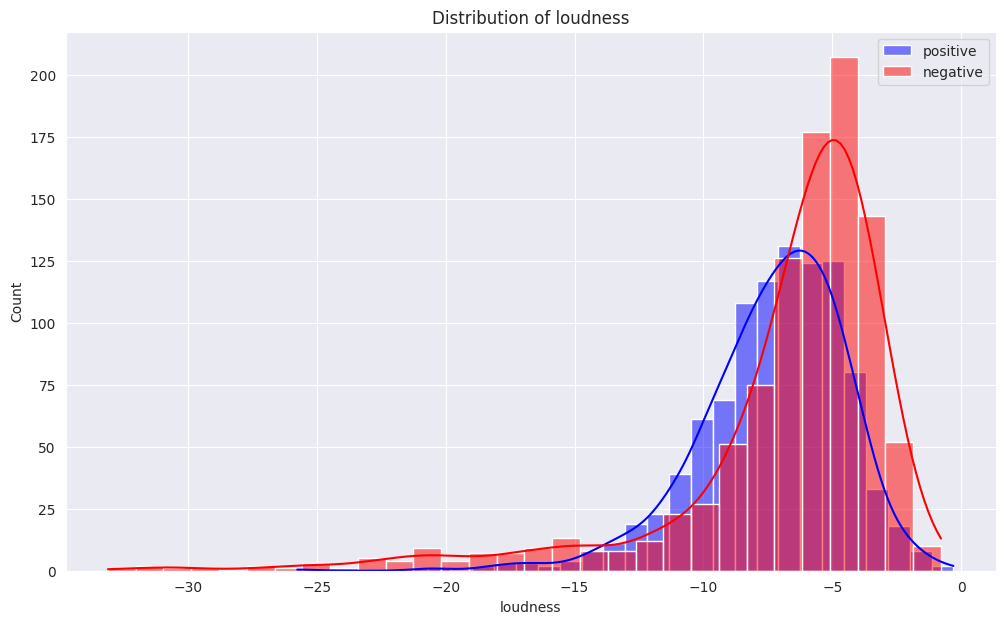

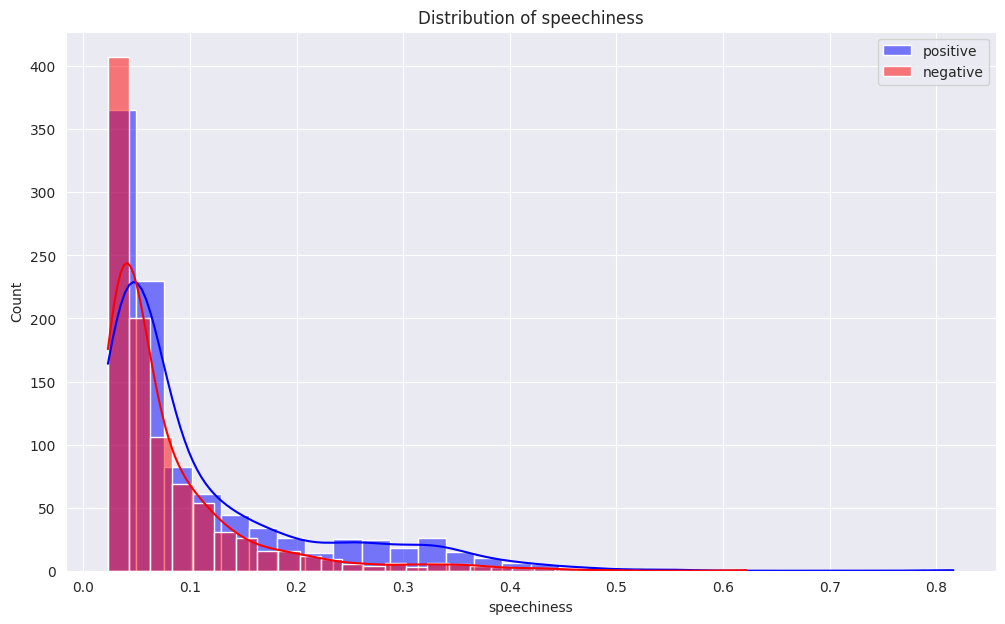

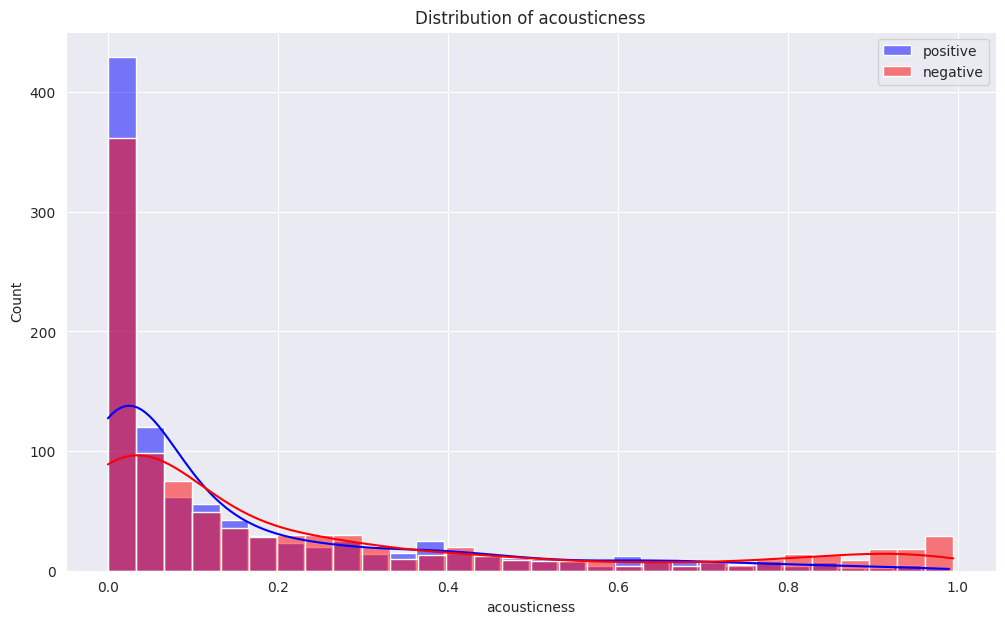

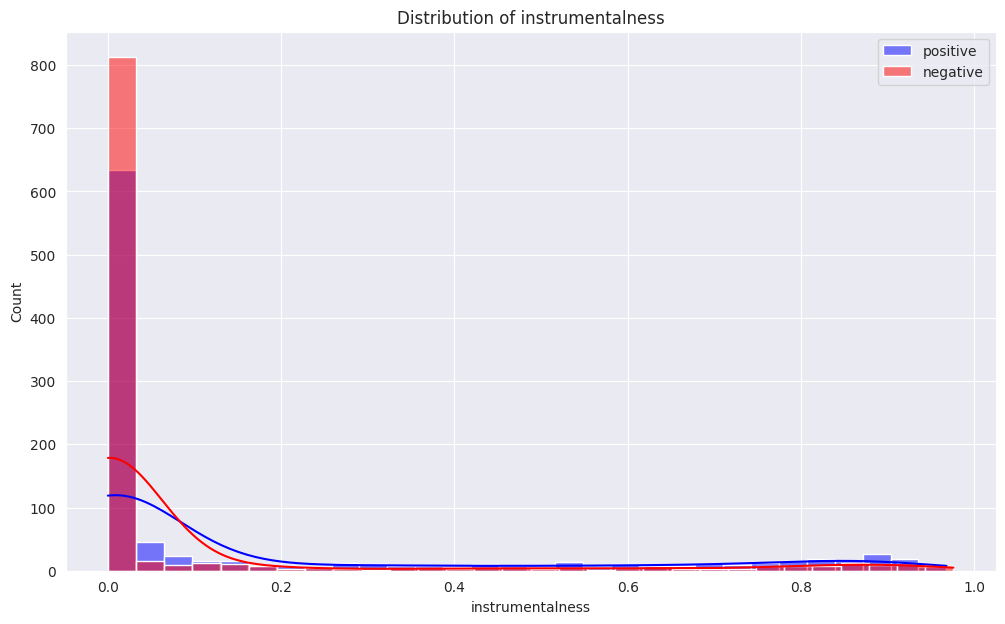

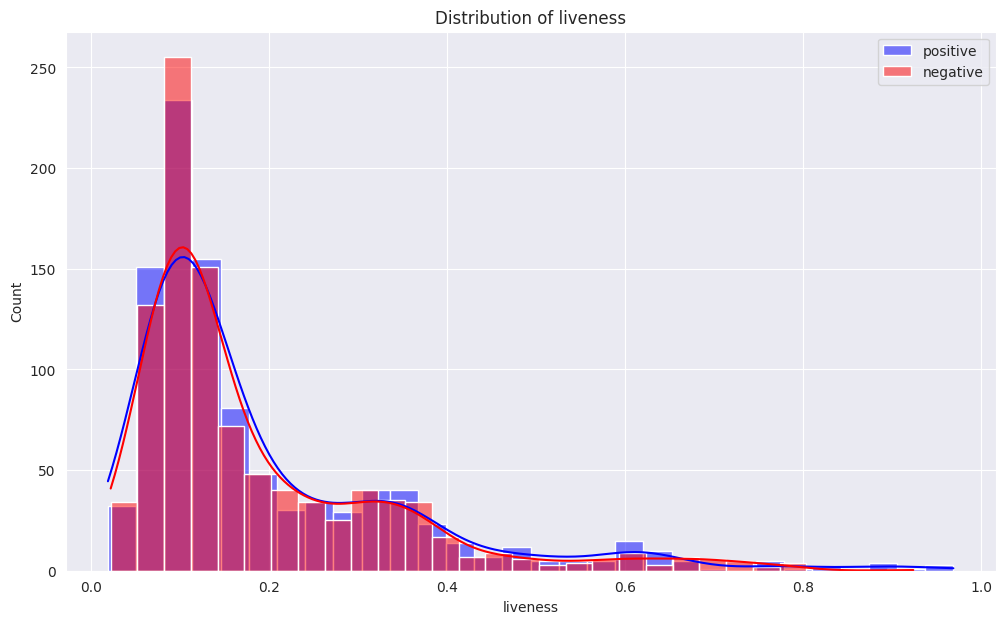

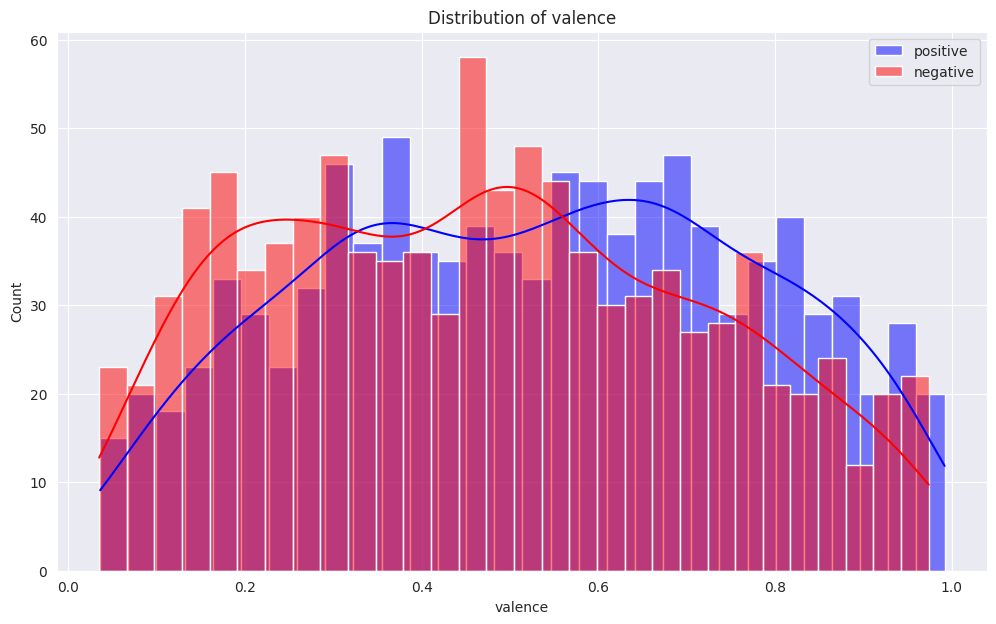

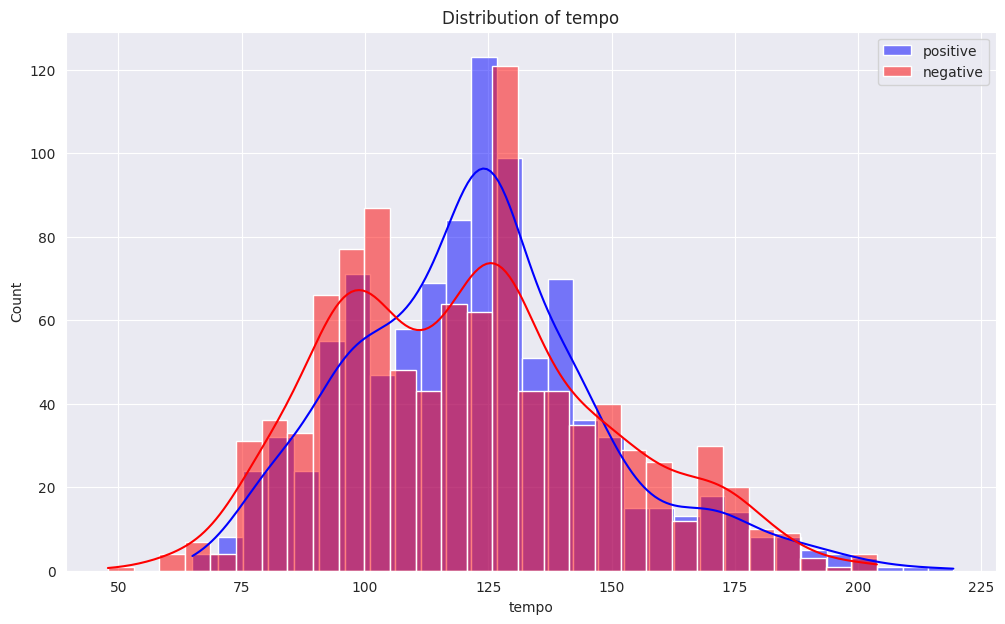

In [ ]:
for feature_col in interest_feature_cols:
  pos_data=df[df["target"]==1][feature_col]
  neg_data=df[df["target"]==0][feature_col]
  plt.figure(figsize=(12,7))
  sns.histplot(pos_data,bins=30,label="positive",color="blue",kde=True)
  sns.histplot(neg_data,bins=30,label="negative",color="red",kde=True)
  plt.legend(loc="upper right")
  plt.title(f"Distribution of {feature_col}")
  plt.show()

# **TOP 10 ENERGETIC TRACKS**

In [ ]:
top_10_energetic_tracks=df[["energy","song_title","artist"]].sort_values(by="energy",ascending=False)[:10]
top_10_energetic_tracks

,energy,song_title,artist
1299,0.998,No Absolution,Thy Art Is Murder
1322,0.997,Pitchblack,Walking Dead On Broadway
1297,0.994,A Darkened Gospel,A Wake in Providence
1347,0.993,Unanswered,Suicide Silence
1680,0.992,Paranoia,A Day To Remember
1332,0.992,Beautiful Agony,Within The Ruins
2015,0.992,First Contact,Twin Moons
1328,0.991,Down into the Abyss,Conjonctive
1296,0.990,Black Colors,Victim Of Deception
1681,0.990,Hated,Beartooth


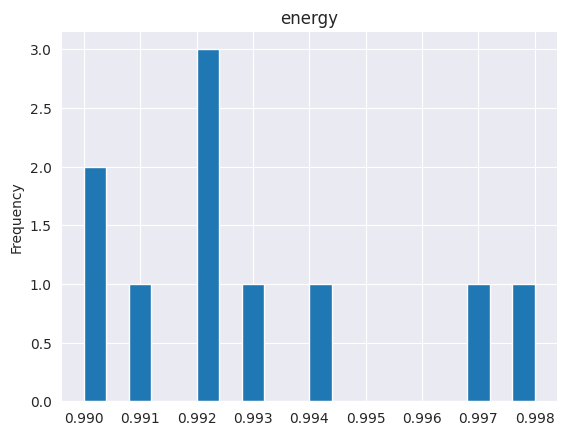

In [ ]:

top_10_energetic_tracks['energy'].plot(kind='hist', bins=20, title='energy')
plt.gca().spines[['top', 'right',]].set_visible(False)

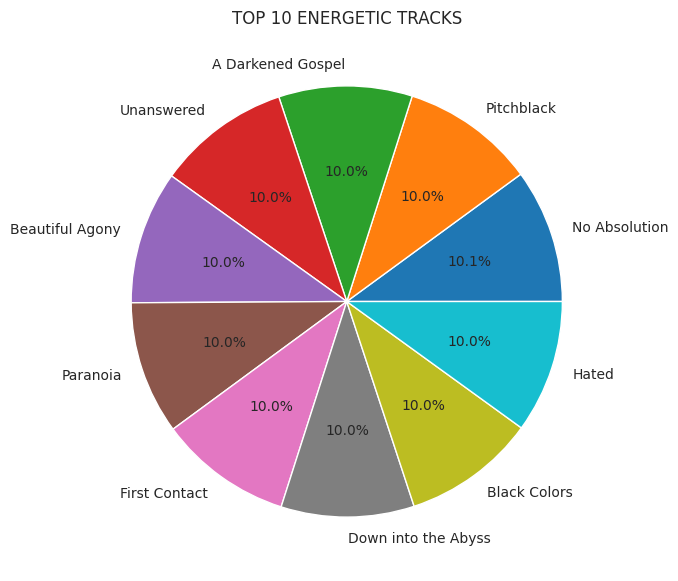

In [ ]:
# Get top 10 energetic tracks by energy
top_10_energetic_tracks = df.nlargest(10, 'energy')[['energy', 'song_title']]

# Convert columns to lists
energy_values = top_10_energetic_tracks['energy'].tolist()
labels_list = top_10_energetic_tracks['song_title'].tolist()

plt.figure(figsize=(12,7))
plt.pie(energy_values, labels=labels_list, autopct='%1.1f%%')
plt.title("TOP 10 ENERGETIC TRACKS")
plt.show()


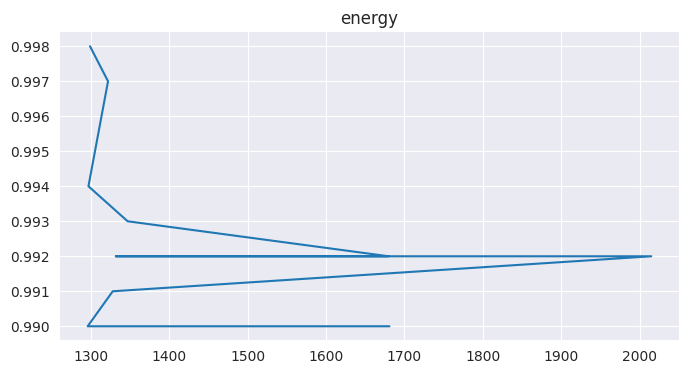

In [ ]:

top_10_energetic_tracks['energy'].plot(kind='line', figsize=(8, 4), title='energy')
plt.gca().spines[['top', 'right']].set_visible(False)

# **MOST TRENDING GENRE**

In [ ]:

most_trending_genre = df[["valence","song_title","artist"]].sort_values(by="valence", ascending=False)
most_trending_genre = most_trending_genre.head(1)


# **TOP 10 TRACKS WITH MOST VALENCE**

In [ ]:
top_10_tracks_with_most_valence= df[["valence","song_title","artist"]].sort_values(by="valence", ascending=False)[:10]
top_10_tracks_with_most_valence

,valence,song_title,artist
460,0.992,Abataka - Original Mix,Ida Engberg
912,0.975,I'm Walkin' - 2002 Digital Remaster,Fats Domino
1966,0.974,"To Roz Bikini (Itsy, Bitsy, Teenie, Weenie)",Polina
207,0.973,Look at You,George McCrae
48,0.973,Azon de ma gnin kpevi,T. P. Orchestre Poly-Rythmo
337,0.972,Let's Lovedance Tonight - Danny Krivit Re-edit...,Gary's Gang
1590,0.972,Jelly On A Plate,The Kids Band
838,0.971,Let's Lovedance Tonight - Danny Krivit Re-edit...,Gary's Gang
497,0.968,Mi Swing es Tropical,Nickodemus
72,0.967,Spooky,Dusty Springfield


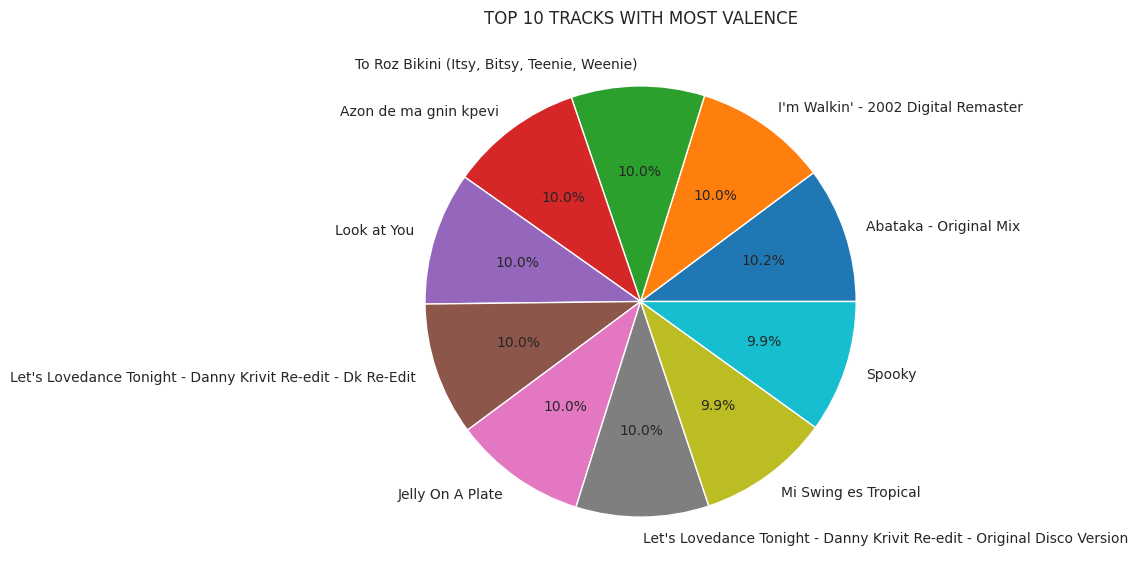

In [ ]:
# Assuming df is already loaded and cleaned
top_10_tracks_with_most_valence = df.nlargest(10, 'valence')[['valence', 'song_title']]

# Convert columns to lists
valence_values = top_10_tracks_with_most_valence['valence'].tolist()
labels_list = top_10_tracks_with_most_valence['song_title'].tolist()

plt.figure(figsize=(12,7))
plt.pie(valence_values, labels=labels_list, autopct='%1.1f%%')
plt.title("TOP 10 TRACKS WITH MOST VALENCE")
plt.show()


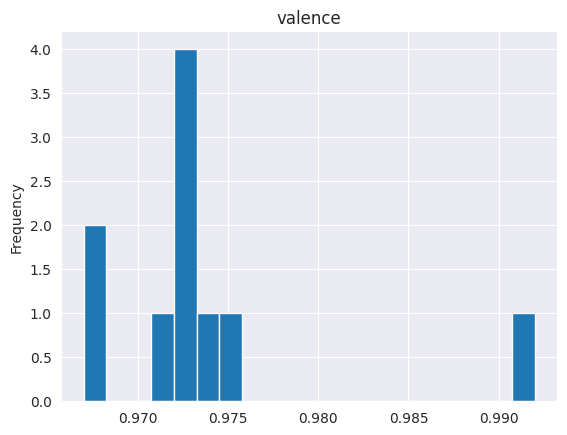

In [ ]:

top_10_tracks_with_most_valence['valence'].plot(kind='hist', bins=20, title='valence')
plt.gca().spines[['top', 'right',]].set_visible(False)

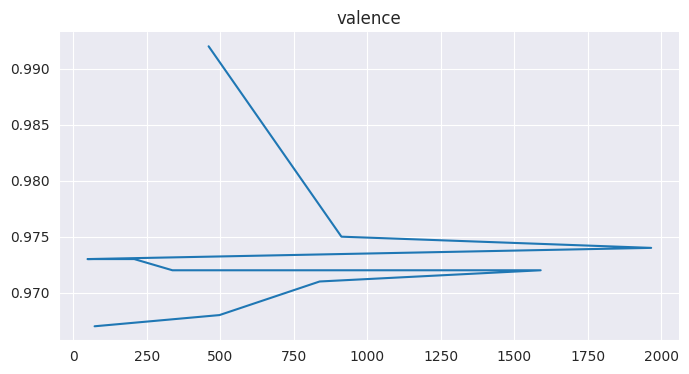

In [ ]:

top_10_tracks_with_most_valence['valence'].plot(kind='line', figsize=(8, 4), title='valence')
plt.gca().spines[['top', 'right']].set_visible(False)

# **MOST COMMON DURATIONS**

In [ ]:
most_common_durations= df[["duration_ms","song_title","artist"]].sort_values(by="duration_ms", ascending=False)[:5]
most_common_durations

,duration_ms,song_title,artist
1535,1004627,The Nearness of You,Joshua Redman
695,849960,Music Is the Answer - Original Extended 12-Inc...,Celeda
819,825027,Southern Man - Live,"Crosby, Stills, Nash & Young"
1603,784013,Viola Sonata in C Minor: III. Andante con vari...,Felix Mendelssohn
1565,763467,Gloomy Sunday,Branford Marsalis


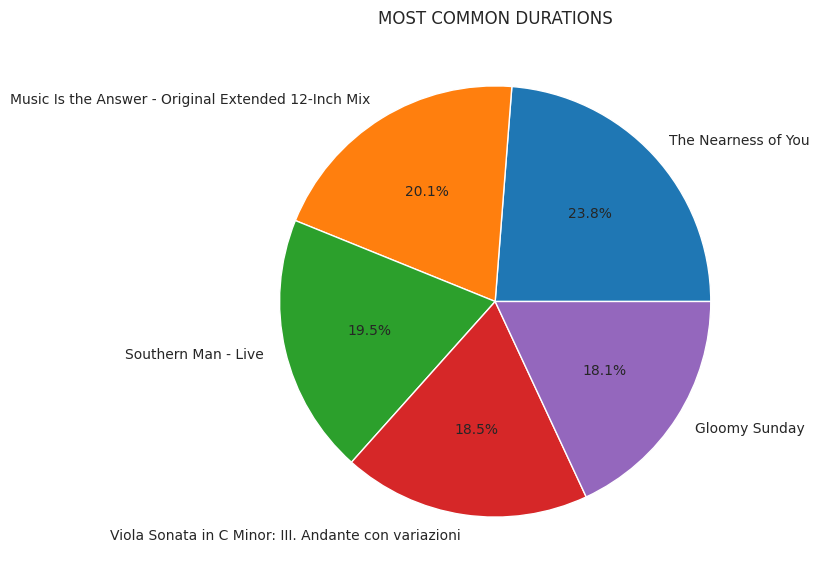

In [ ]:
# Assuming most_common_durations is a DataFrame with columns 'duration_ms' and 'song_title'
duration_values = most_common_durations['duration_ms'].tolist()
labels_list = most_common_durations['song_title'].tolist()

plt.figure(figsize=(12,7))
plt.pie(duration_values, labels=labels_list, autopct='%1.1f%%')
plt.title("MOST COMMON DURATIONS")
plt.show()


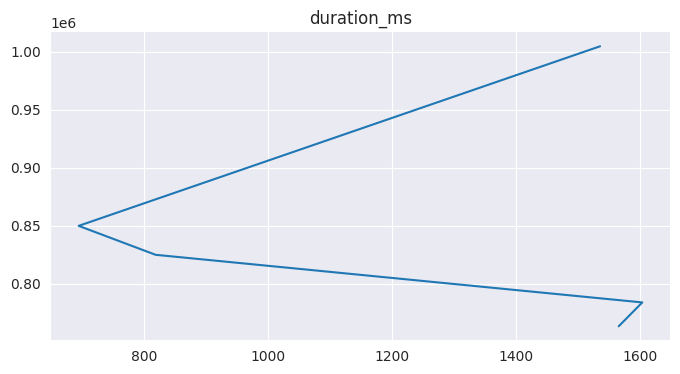

In [ ]:

most_common_durations['duration_ms'].plot(kind='line', figsize=(8, 4), title='duration_ms')
plt.gca().spines[['top', 'right']].set_visible(False)

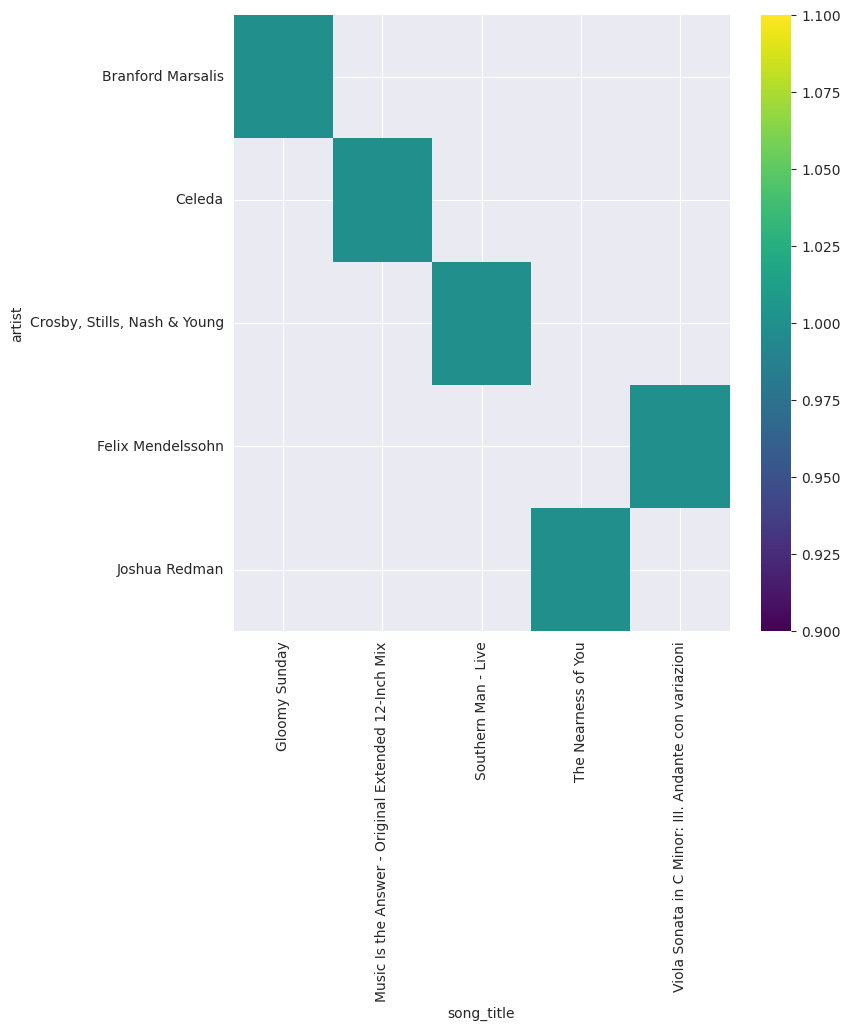

In [ ]:

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['artist'].value_counts()
    for x_label, grp in most_common_durations.groupby('song_title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('song_title')
_ = plt.ylabel('artist')